Predicting wine quality: Here I use Recursive Feature Elimination method for Feature selection and Random search for searching method.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
red_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(red_wine.shape)

(1599, 12)


Add a feature regarding quality

In [68]:

red_wine["wine_quality"]=red_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <=7
else 'high')
red_wine['wine_quality']= pd.Categorical(red_wine['wine_quality'], categories=['low','medium','high'])
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


As it is seen above most of features are right-skewed. I transform the data to log to bring the destribution of data closeer to normal.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

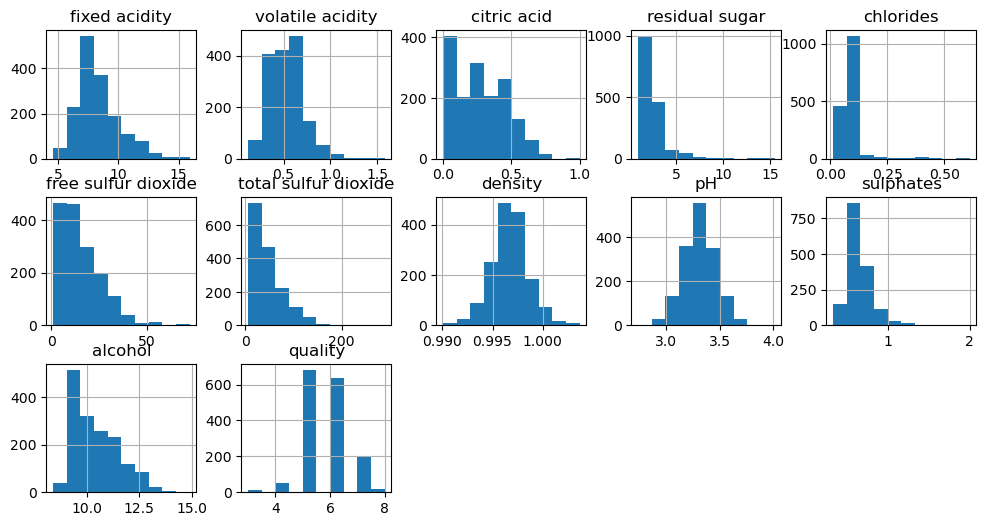

In [69]:
red_wine.hist(figsize=(12,6),layout=(3,5))

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

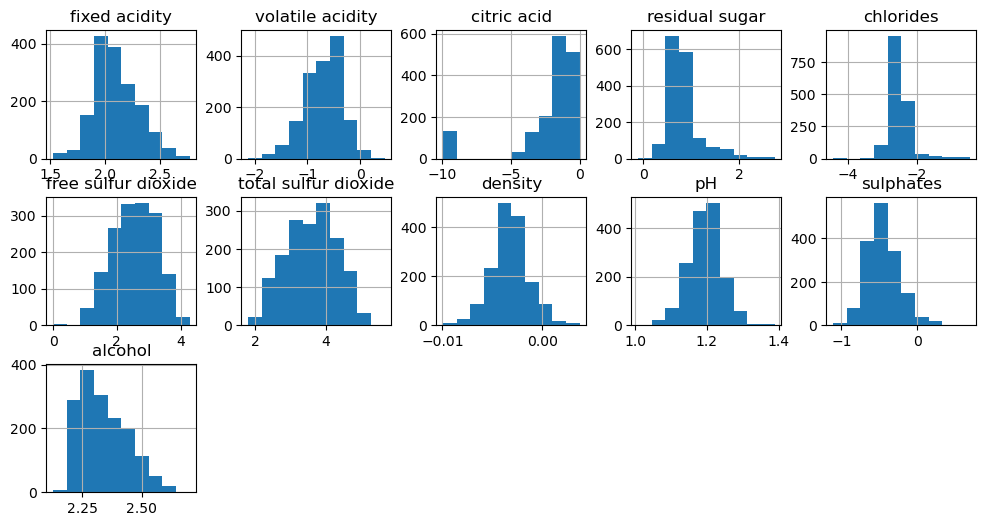

In [70]:
red_wine_t=np.log((red_wine[red_wine.columns[:-2]])+0.00005)
red_wine_t["wine_quality"]=red_wine["wine_quality"]
red_wine_t.hist(figsize=(12,6),layout=(3,5))

Plot pie chart to see how many red and white wines are there in the data set

([<matplotlib.patches.Wedge at 0x7ff89b950e20>,
 [Text(-0.08097155337995972, 1.0970157736073063, 'low'),
  Text(0.042133069811390665, -1.0991927967505377, 'medium'),
  Text(1.099312198304196, -0.03889332410062434, 'high')],
 [Text(-0.04416630184361439, 0.5983722401494397, '52.35'),
  Text(0.022981674442576722, -0.599559707318475, '46.53'),
  Text(0.5996248354386523, -0.021214540418522367, '1.13')])

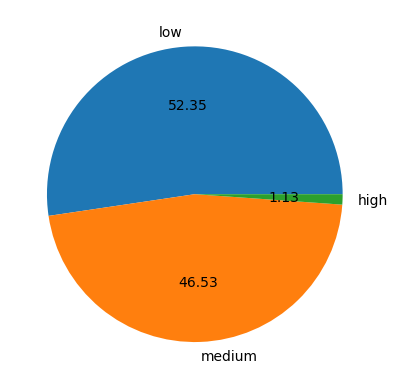

In [71]:
plt.pie(red_wine_t['wine_quality'].value_counts(), labels=red_wine_t['wine_quality'].unique(), autopct='%.2f')

In [72]:
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='high', 2,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='medium', 1,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='low', 0,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=red_wine_t['wine_quality'].astype('int32')
red_wine_t['wine_quality'].value_counts()

1    837
0    744
2     18
Name: wine_quality, dtype: int64

Split data

In [73]:
from sklearn.model_selection import train_test_split
x, y=red_wine_t[red_wine_t.columns[:-2]], red_wine_t[red_wine_t.columns[-1]]
x=np.array(x)
y=np.array(y)
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42,stratify=y) 

Create pipelines to use in nested cross validation

In [74]:
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier as Xgb
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier as LighGB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, make_scorer, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve

# initiakising classifiers

m1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=1)
m2 = AdaBoostClassifier(random_state=1)
m3 = DecisionTreeClassifier(random_state=1)
m4 = LighGB(random_state=1)
m5 = RandomForestClassifier(random_state=1)

# Building the pipelines
pipe1 = Pipeline([('rfe', RFE(estimator=m1)),
                  ('m1', m1)])

pipe2 = Pipeline([('rfe', RFE(estimator=m2)),
                  ('m2', m2)])
                
pipe3=Pipeline([('rfe', RFE(estimator=m3)),
                  ('m3', m3)])

pipe4 = Pipeline([('rfe', RFE(estimator=m4)),
                  ('m4', m4)])
pipe5 = Pipeline([('rfe', RFE(estimator=m5)),
                  ('m5', m5)])



# Setting up the parameter grids
par1 = [{"rfe__n_features_to_select": [4,6,8,10], 'm1__penalty': ['l2'],
                'm1__C': np.power(10., np.arange(-4, 4))}]

par2 = [{"rfe__n_features_to_select": [4,6,8,10],"m2__n_estimators":[50,100,200,400,600], 
"m2__learning_rate": [1,3,5,12,16,20]}]

par3 = [{ "rfe__n_features_to_select": [4,6,8,10], "m3__criterion": ["gini", "entropy"],
"m3__splitter": ["best", "random"], "m3__max_depth": [None, 5,7,12,20]}]

par4 = [{"rfe__n_features_to_select": [4,5,6,7,8,9], 
"m4__max_depth": [-1,5,8], "m4__n_estimators": [100,300,500,30,700],
"m4__learning_rate": [1,2,4], "m4__subsample_for_bin":[500,1000,10000,200000]}]
par5 = [{"rfe__n_features_to_select": [4,6,8,10],  "m5__max_depth": [None,5,8,12,20],
              "m5__n_estimators" :[100,300,50,400,600],
              "m5__criterion": ["gini","entropy"],
              "m5__min_samples_split": [2,4,6],"m5__min_samples_leaf": [1,2,4,5]}]
 

Creat inner CV

In [75]:
pipe=[pipe1,pipe2,pipe3,pipe4,pipe5]
par_grid=[par1,par2,par3,par4,par5]
gcv_all=[]
f1 = make_scorer(f1_score , average='macro')

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for i in range(len(pipe)):
    gcv = RandomizedSearchCV(estimator=pipe[i],
                        param_distributions=par_grid[i],
                        scoring='balanced_accuracy',
                        n_jobs=-1,
                        n_iter=30,
                        cv=inner_cv,
                        verbose=0,
                        refit=True)
    gcv_all.append(gcv)


Function for ploting learning curves

In [76]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [87]:
def con(y_test,pred_rfc):
    labels = np.unique(y_test)
    a = confusion_matrix(y_test, pred_rfc)
    a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
    display(a)


Out CV + plotting learning curves 

In [96]:
final_mscores

0.7634408602150538

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

  LogisticRegression


 score of gcv_out predict 70.57%

       Best balanced accuracy score in inner CV 45.84%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm1__penalty': 'l2', 'm1__C': 0.1}
       Best score in outer CV 70.54%

 Score of best_estimator in outer CV 70.57%

 Score of best_estimator on test data 67.89%
Confusion Matrix of test data in CV: 


,low,medium,high
low,34,14,0
medium,18,45,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,144,69,0
medium,79,182,6
high,0,0,0




 score of gcv_out predict 69.56%

       Best balanced accuracy score in inner CV 46.32%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm1__penalty': 'l2', 'm1__C': 1000.0}
       Best score in outer CV 69.64%

 Score of best_estimator in outer CV 69.56%

 Score of best_estimator on test data 69.94%
Confusion Matrix of test data in CV: 


,low,medium,high
low,36,17,0
medium,16,42,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,158,73,0
medium,65,178,6
high,0,0,0




 score of gcv_out predict 62.55%

       Best balanced accuracy score in inner CV 47.32%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm1__penalty': 'l2', 'm1__C': 10.0}
       Best score in outer CV 62.50%

 Score of best_estimator in outer CV 62.55%

 Score of best_estimator on test data 69.10%
Confusion Matrix of test data in CV: 


,low,medium,high
low,34,23,0
medium,18,36,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,151,70,0
medium,72,181,6
high,0,0,0




 score of gcv_out predict 69.56%

       Best balanced accuracy score in inner CV 47.06%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm1__penalty': 'l2', 'm1__C': 1000.0}
       Best score in outer CV 69.64%

 Score of best_estimator in outer CV 69.56%

 Score of best_estimator on test data 70.99%
Confusion Matrix of test data in CV: 


,low,medium,high
low,36,17,0
medium,16,42,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,161,71,0
medium,62,180,6
high,0,0,0




 score of gcv_out predict 77.05%

       Best balanced accuracy score in inner CV 45.89%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm1__penalty': 'l2', 'm1__C': 1000.0}
       Best score in outer CV 76.79%

 Score of best_estimator in outer CV 77.05%

 Score of best_estimator on test data 70.15%
Confusion Matrix of test data in CV: 


,low,medium,high
low,37,10,0
medium,15,49,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,155,69,0
medium,68,182,6
high,0,0,0




 score of gcv_out predict 66.89%

       Best balanced accuracy score in inner CV 46.22%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm1__penalty': 'l2', 'm1__C': 1.0}
       Best score in outer CV 66.96%

 Score of best_estimator in outer CV 66.89%

 Score of best_estimator on test data 68.92%
Confusion Matrix of test data in CV: 


,low,medium,high
low,35,19,0
medium,17,40,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,148,68,0
medium,75,183,6
high,0,0,0




 score of gcv_out predict 62.69%

       Best balanced accuracy score in inner CV 46.90%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm1__penalty': 'l2', 'm1__C': 100.0}
       Best score in outer CV 62.50%

 Score of best_estimator in outer CV 62.69%

 Score of best_estimator on test data 68.70%
Confusion Matrix of test data in CV: 


,low,medium,high
low,36,24,0
medium,17,34,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,148,69,0
medium,75,182,6
high,0,0,0




 score of gcv_out predict 61.62%

       Best balanced accuracy score in inner CV 46.75%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm1__penalty': 'l2', 'm1__C': 1000.0}
       Best score in outer CV 61.61%

 Score of best_estimator in outer CV 61.62%

 Score of best_estimator on test data 69.94%
Confusion Matrix of test data in CV: 


,low,medium,high
low,29,18,0
medium,23,40,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,154,69,0
medium,69,182,6
high,0,0,0




 score of gcv_out predict 69.68%

       Best balanced accuracy score in inner CV 46.10%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm1__penalty': 'l2', 'm1__C': 10.0}
       Best score in outer CV 68.75%

 Score of best_estimator in outer CV 69.68%

 Score of best_estimator on test data 67.66%
Confusion Matrix of test data in CV: 


,low,medium,high
low,30,11,0
medium,22,47,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,145,71,0
medium,78,180,6
high,0,0,0




 score of gcv_out predict 76.51%

       Best balanced accuracy score in inner CV 45.29%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm1__penalty': 'l2', 'm1__C': 1.0}
       Best score in outer CV 76.58%

 Score of best_estimator in outer CV 76.51%

 Score of best_estimator on test data 65.97%
Confusion Matrix of test data in CV: 


,low,medium,high
low,40,13,1
medium,12,45,0
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,142,76,0
medium,81,175,6
high,0,0,0



    Outer Loop:
        balanced accuracy score 68.55% +/- 5.12


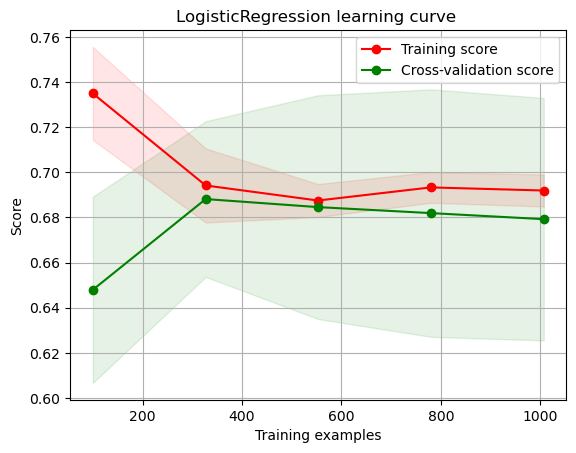

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

  AdaBoostClassifier


 score of gcv_out predict 38.73%

       Best balanced accuracy score in inner CV 46.12%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 400, 'm2__learning_rate': 1}
       Best score in outer CV 55.36%

 Score of best_estimator in outer CV 38.73%

 Score of best_estimator on test data 54.53%
Confusion Matrix of test data in CV: 


,low,medium,high
low,41,37,0
medium,11,21,1
high,0,1,0


Confusion Matrix of total test data: 


,low,medium,high
low,196,142,0
medium,27,104,4
high,0,5,2




 score of gcv_out predict 48.96%

       Best balanced accuracy score in inner CV 46.94%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm2__n_estimators': 100, 'm2__learning_rate': 5}
       Best score in outer CV 28.57%

 Score of best_estimator in outer CV 48.96%

 Score of best_estimator on test data 27.26%
Confusion Matrix of test data in CV: 


,low,medium,high
low,2,0,0
medium,33,30,1
high,17,29,0


Confusion Matrix of total test data: 


,low,medium,high
low,11,16,0
medium,166,101,0
high,46,134,6




 score of gcv_out predict 56.94%

       Best balanced accuracy score in inner CV 45.69%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 400, 'm2__learning_rate': 3}
       Best score in outer CV 55.36%

 Score of best_estimator in outer CV 56.94%

 Score of best_estimator on test data 79.60%
Confusion Matrix of test data in CV: 


,low,medium,high
low,37,34,1
medium,15,25,0
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,190,120,0
medium,33,131,5
high,0,0,1




 score of gcv_out predict 65.76%

       Best balanced accuracy score in inner CV 45.76%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 100, 'm2__learning_rate': 1}
       Best score in outer CV 64.29%

 Score of best_estimator in outer CV 65.76%

 Score of best_estimator on test data 49.85%
Confusion Matrix of test data in CV: 


,low,medium,high
low,41,28,0
medium,11,31,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,178,127,0
medium,44,121,5
high,1,3,1




 score of gcv_out predict 50.33%

       Best balanced accuracy score in inner CV 42.22%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 400, 'm2__learning_rate': 1}
       Best score in outer CV 70.54%

 Score of best_estimator in outer CV 50.33%

 Score of best_estimator on test data 61.84%
Confusion Matrix of test data in CV: 


,low,medium,high
low,48,26,0
medium,4,31,1
high,0,2,0


Confusion Matrix of total test data: 


,low,medium,high
low,196,142,0
medium,27,107,4
high,0,2,2




 score of gcv_out predict 46.52%

       Best balanced accuracy score in inner CV 43.37%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 600, 'm2__learning_rate': 3}
       Best score in outer CV 68.75%

 Score of best_estimator in outer CV 46.52%

 Score of best_estimator on test data 58.72%
Confusion Matrix of test data in CV: 


,low,medium,high
low,40,21,0
medium,12,37,1
high,0,1,0


Confusion Matrix of total test data: 


,low,medium,high
low,169,123,0
medium,54,127,5
high,0,1,1




 score of gcv_out predict 46.19%

       Best balanced accuracy score in inner CV 42.18%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 200, 'm2__learning_rate': 1}
       Best score in outer CV 62.50%

 Score of best_estimator in outer CV 46.19%

 Score of best_estimator on test data 56.72%
Confusion Matrix of test data in CV: 


,low,medium,high
low,48,32,0
medium,5,22,1
high,0,4,0


Confusion Matrix of total test data: 


,low,medium,high
low,204,155,0
medium,19,92,4
high,0,4,2




 score of gcv_out predict 40.38%

       Best balanced accuracy score in inner CV 44.01%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 50, 'm2__learning_rate': 1}
       Best score in outer CV 58.93%

 Score of best_estimator in outer CV 40.38%

 Score of best_estimator on test data 76.45%
Confusion Matrix of test data in CV: 


,low,medium,high
low,31,20,0
medium,21,35,2
high,0,3,0


Confusion Matrix of total test data: 


,low,medium,high
low,147,88,0
medium,76,163,5
high,0,0,1




 score of gcv_out predict 68.49%

       Best balanced accuracy score in inner CV 45.95%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm2__n_estimators': 100, 'm2__learning_rate': 1}
       Best score in outer CV 67.86%

 Score of best_estimator in outer CV 68.49%

 Score of best_estimator on test data 53.35%
Confusion Matrix of test data in CV: 


,low,medium,high
low,41,23,0
medium,11,35,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,169,121,0
medium,54,128,5
high,0,2,1




 score of gcv_out predict 67.80%

       Best balanced accuracy score in inner CV 43.44%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 600, 'm2__learning_rate': 3}
       Best score in outer CV 65.77%

 Score of best_estimator in outer CV 67.80%

 Score of best_estimator on test data 60.76%
Confusion Matrix of test data in CV: 


,low,medium,high
low,42,27,1
medium,10,31,0
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,170,108,1
medium,53,142,4
high,0,1,1



    Outer Loop:
        balanced accuracy score 64.17% +/- 9.96


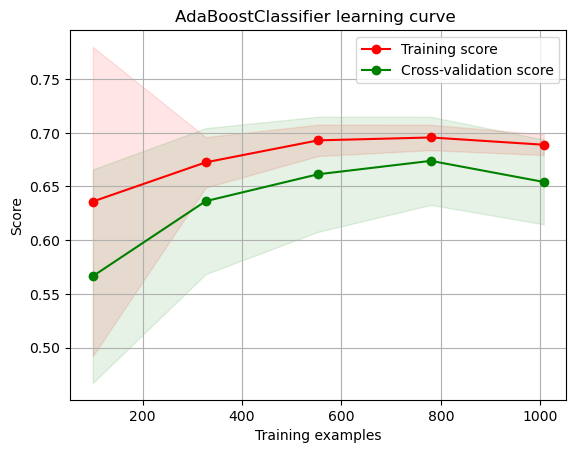

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

  DecisionTreeClassifier


 score of gcv_out predict 49.22%

       Best balanced accuracy score in inner CV 47.56%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm3__splitter': 'best', 'm3__max_depth': 12, 'm3__criterion': 'entropy'}
       Best score in outer CV 73.21%

 Score of best_estimator in outer CV 49.22%

 Score of best_estimator on test data 57.19%
Confusion Matrix of test data in CV: 


,low,medium,high
low,36,13,0
medium,15,46,1
high,1,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,159,59,0
medium,63,190,5
high,1,2,1




 score of gcv_out predict 64.18%

       Best balanced accuracy score in inner CV 50.62%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm3__splitter': 'best', 'm3__max_depth': 7, 'm3__criterion': 'entropy'}
       Best score in outer CV 64.29%

 Score of best_estimator in outer CV 64.18%

 Score of best_estimator on test data 65.54%
Confusion Matrix of test data in CV: 


,low,medium,high
low,33,20,0
medium,19,39,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,145,81,0
medium,78,170,6
high,0,0,0




 score of gcv_out predict 64.84%

       Best balanced accuracy score in inner CV 48.36%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm3__splitter': 'random', 'm3__max_depth': 7, 'm3__criterion': 'gini'}
       Best score in outer CV 64.29%

 Score of best_estimator in outer CV 64.84%

 Score of best_estimator on test data 46.53%
Confusion Matrix of test data in CV: 


,low,medium,high
low,26,13,0
medium,26,46,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,118,41,1
medium,104,210,5
high,1,0,0




 score of gcv_out predict 47.77%

       Best balanced accuracy score in inner CV 51.12%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm3__splitter': 'random', 'm3__max_depth': 20, 'm3__criterion': 'entropy'}
       Best score in outer CV 67.86%

 Score of best_estimator in outer CV 47.77%

 Score of best_estimator on test data 52.44%
Confusion Matrix of test data in CV: 


,low,medium,high
low,41,20,0
medium,10,35,1
high,1,4,0


Confusion Matrix of total test data: 


,low,medium,high
low,157,55,0
medium,64,189,5
high,2,7,1




 score of gcv_out predict 49.98%

       Best balanced accuracy score in inner CV 49.67%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm3__splitter': 'best', 'm3__max_depth': 7, 'm3__criterion': 'entropy'}
       Best score in outer CV 74.11%

 Score of best_estimator in outer CV 49.98%

 Score of best_estimator on test data 67.14%
Confusion Matrix of test data in CV: 


,low,medium,high
low,35,10,1
medium,17,48,0
high,0,1,0


Confusion Matrix of total test data: 


,low,medium,high
low,164,94,0
medium,59,157,6
high,0,0,0




 score of gcv_out predict 48.48%

       Best balanced accuracy score in inner CV 48.53%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm3__splitter': 'best', 'm3__max_depth': 20, 'm3__criterion': 'entropy'}
       Best score in outer CV 71.43%

 Score of best_estimator in outer CV 48.48%

 Score of best_estimator on test data 49.73%
Confusion Matrix of test data in CV: 


,low,medium,high
low,39,16,0
medium,13,41,1
high,0,2,0


Confusion Matrix of total test data: 


,low,medium,high
low,148,72,0
medium,73,168,4
high,2,11,2




 score of gcv_out predict 45.09%

       Best balanced accuracy score in inner CV 45.80%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm3__splitter': 'best', 'm3__max_depth': 20, 'm3__criterion': 'entropy'}
       Best score in outer CV 66.96%

 Score of best_estimator in outer CV 45.09%

 Score of best_estimator on test data 55.22%
Confusion Matrix of test data in CV: 


,low,medium,high
low,37,20,0
medium,15,38,1
high,1,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,158,65,0
medium,64,180,4
high,1,6,2




 score of gcv_out predict 61.58%

       Best balanced accuracy score in inner CV 48.04%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm3__splitter': 'best', 'm3__max_depth': 5, 'm3__criterion': 'gini'}
       Best score in outer CV 61.61%

 Score of best_estimator in outer CV 61.58%

 Score of best_estimator on test data 63.71%
Confusion Matrix of test data in CV: 


,low,medium,high
low,33,22,0
medium,19,36,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,145,90,0
medium,78,161,6
high,0,0,0




 score of gcv_out predict 65.29%

       Best balanced accuracy score in inner CV 50.87%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm3__splitter': 'best', 'm3__max_depth': None, 'm3__criterion': 'entropy'}
       Best score in outer CV 65.18%

 Score of best_estimator in outer CV 65.29%

 Score of best_estimator on test data 57.18%
Confusion Matrix of test data in CV: 


,low,medium,high
low,31,16,0
medium,21,42,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,164,64,0
medium,58,185,5
high,1,2,1




 score of gcv_out predict 68.50%

       Best balanced accuracy score in inner CV 47.82%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm3__splitter': 'random', 'm3__max_depth': 20, 'm3__criterion': 'entropy'}
       Best score in outer CV 68.47%

 Score of best_estimator in outer CV 68.50%

 Score of best_estimator on test data 54.39%
Confusion Matrix of test data in CV: 


,low,medium,high
low,33,15,0
medium,19,43,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,149,68,0
medium,74,180,5
high,0,3,1



    Outer Loop:
        balanced accuracy score 65.36% +/- 8.61


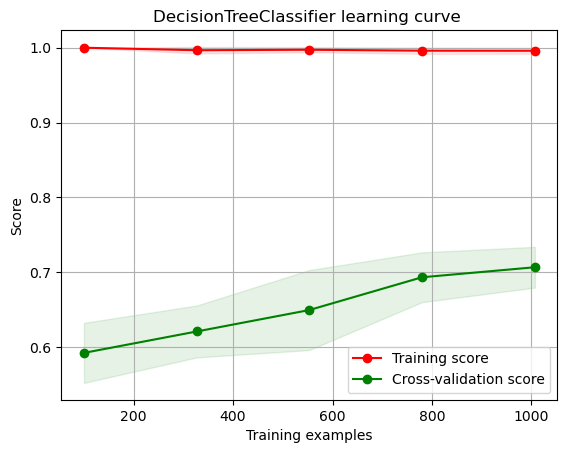

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

  LighGB


 score of gcv_out predict 40.08%

       Best balanced accuracy score in inner CV 44.83%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm4__subsample_for_bin': 1000, 'm4__n_estimators': 700, 'm4__max_depth': 5, 'm4__learning_rate': 1}
       Best score in outer CV 59.82%

 Score of best_estimator in outer CV 40.08%

 Score of best_estimator on test data 39.22%
Confusion Matrix of test data in CV: 


,low,medium,high
low,27,19,0
medium,24,40,1
high,1,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,124,93,1
medium,97,158,5
high,2,0,0




 score of gcv_out predict 50.26%

       Best balanced accuracy score in inner CV 46.74%
        Best parameters in inner CV: {'rfe__n_features_to_select': 4, 'm4__subsample_for_bin': 1000, 'm4__n_estimators': 100, 'm4__max_depth': 5, 'm4__learning_rate': 4}
       Best score in outer CV 50.00%

 Score of best_estimator in outer CV 50.26%

 Score of best_estimator on test data 52.37%
Confusion Matrix of test data in CV: 


,low,medium,high
low,28,31,1
medium,24,28,0
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,129,130,3
medium,94,121,3
high,0,0,0




 score of gcv_out predict 39.74%

       Best balanced accuracy score in inner CV 42.10%
        Best parameters in inner CV: {'rfe__n_features_to_select': 4, 'm4__subsample_for_bin': 10000, 'm4__n_estimators': 500, 'm4__max_depth': 5, 'm4__learning_rate': 2}
       Best score in outer CV 36.61%

 Score of best_estimator in outer CV 39.74%

 Score of best_estimator on test data 34.47%
Confusion Matrix of test data in CV: 


,low,medium,high
low,31,27,1
medium,5,10,0
high,16,22,0


Confusion Matrix of total test data: 


,low,medium,high
low,137,142,5
medium,15,18,0
high,71,91,1




 score of gcv_out predict 38.96%

       Best balanced accuracy score in inner CV 44.11%
        Best parameters in inner CV: {'rfe__n_features_to_select': 4, 'm4__subsample_for_bin': 10000, 'm4__n_estimators': 300, 'm4__max_depth': -1, 'm4__learning_rate': 1}
       Best score in outer CV 56.25%

 Score of best_estimator in outer CV 38.96%

 Score of best_estimator on test data 48.76%
Confusion Matrix of test data in CV: 


,low,medium,high
low,38,33,1
medium,14,25,0
high,0,1,0


Confusion Matrix of total test data: 


,low,medium,high
low,130,149,2
medium,93,102,4
high,0,0,0




 score of gcv_out predict 34.07%

       Best balanced accuracy score in inner CV 43.26%
        Best parameters in inner CV: {'rfe__n_features_to_select': 4, 'm4__subsample_for_bin': 500, 'm4__n_estimators': 100, 'm4__max_depth': -1, 'm4__learning_rate': 4}
       Best score in outer CV 47.32%

 Score of best_estimator in outer CV 34.07%

 Score of best_estimator on test data 34.69%
Confusion Matrix of test data in CV: 


,low,medium,high
low,36,40,0
medium,13,17,1
high,3,2,0


Confusion Matrix of total test data: 


,low,medium,high
low,139,141,4
medium,81,102,2
high,3,8,0




 score of gcv_out predict 43.33%

       Best balanced accuracy score in inner CV 42.81%
        Best parameters in inner CV: {'rfe__n_features_to_select': 5, 'm4__subsample_for_bin': 500, 'm4__n_estimators': 700, 'm4__max_depth': 5, 'm4__learning_rate': 2}
       Best score in outer CV 42.86%

 Score of best_estimator in outer CV 43.33%

 Score of best_estimator on test data 44.19%
Confusion Matrix of test data in CV: 


,low,medium,high
low,29,40,1
medium,23,19,0
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,107,147,5
medium,116,104,1
high,0,0,0




 score of gcv_out predict 35.51%

       Best balanced accuracy score in inner CV 54.09%
        Best parameters in inner CV: {'rfe__n_features_to_select': 7, 'm4__subsample_for_bin': 10000, 'm4__n_estimators': 500, 'm4__max_depth': 5, 'm4__learning_rate': 4}
       Best score in outer CV 51.79%

 Score of best_estimator in outer CV 35.51%

 Score of best_estimator on test data 42.44%
Confusion Matrix of test data in CV: 


,low,medium,high
low,31,28,0
medium,22,27,1
high,0,3,0


Confusion Matrix of total test data: 


,low,medium,high
low,162,148,1
medium,56,101,4
high,5,2,1




 score of gcv_out predict 58.96%

       Best balanced accuracy score in inner CV 47.85%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm4__subsample_for_bin': 1000, 'm4__n_estimators': 100, 'm4__max_depth': 5, 'm4__learning_rate': 1}
       Best score in outer CV 58.93%

 Score of best_estimator in outer CV 58.96%

 Score of best_estimator on test data 44.03%
Confusion Matrix of test data in CV: 


,low,medium,high
low,26,18,0
medium,26,40,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,131,65,0
medium,92,184,6
high,0,2,0




 score of gcv_out predict 73.42%

       Best balanced accuracy score in inner CV 41.88%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm4__subsample_for_bin': 10000, 'm4__n_estimators': 700, 'm4__max_depth': -1, 'm4__learning_rate': 1}
       Best score in outer CV 47.32%

 Score of best_estimator in outer CV 73.42%

 Score of best_estimator on test data 37.49%
Confusion Matrix of test data in CV: 


,low,medium,high
low,52,57,2
medium,0,1,0
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,211,246,6
medium,12,5,0
high,0,0,0




 score of gcv_out predict 44.19%

       Best balanced accuracy score in inner CV 44.74%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm4__subsample_for_bin': 10000, 'm4__n_estimators': 700, 'm4__max_depth': -1, 'm4__learning_rate': 2}
       Best score in outer CV 65.77%

 Score of best_estimator in outer CV 44.19%

 Score of best_estimator on test data 41.91%
Confusion Matrix of test data in CV: 


,low,medium,high
low,34,19,0
medium,17,39,1
high,1,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,143,91,0
medium,80,157,6
high,0,3,0



    Outer Loop:
        balanced accuracy score 61.94% +/- 10.38


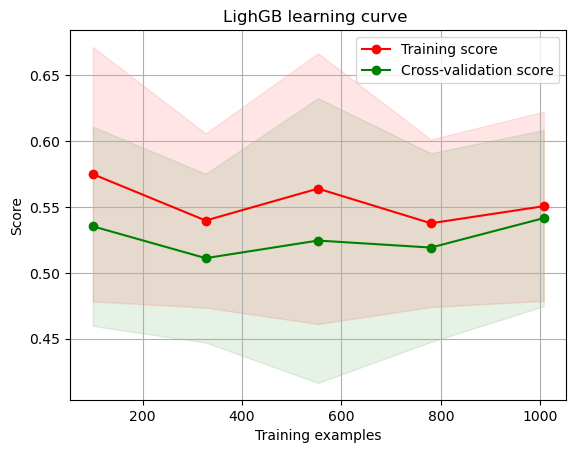

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

  RandomForestClassifier


 score of gcv_out predict 74.04%

       Best balanced accuracy score in inner CV 48.74%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 100, 'm5__min_samples_split': 4, 'm5__min_samples_leaf': 2, 'm5__max_depth': None, 'm5__criterion': 'gini'}
       Best score in outer CV 74.11%

 Score of best_estimator in outer CV 74.04%

 Score of best_estimator on test data 75.16%
Confusion Matrix of test data in CV: 


,low,medium,high
low,39,15,0
medium,13,44,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,168,58,0
medium,55,193,6
high,0,0,0




 score of gcv_out predict 80.36%

       Best balanced accuracy score in inner CV 49.16%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm5__n_estimators': 100, 'm5__min_samples_split': 4, 'm5__min_samples_leaf': 1, 'm5__max_depth': 20, 'm5__criterion': 'gini'}
       Best score in outer CV 80.36%

 Score of best_estimator in outer CV 80.36%

 Score of best_estimator on test data 74.95%
Confusion Matrix of test data in CV: 


,low,medium,high
low,41,10,0
medium,11,49,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,167,58,0
medium,56,193,6
high,0,0,0




 score of gcv_out predict 64.24%

       Best balanced accuracy score in inner CV 49.60%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 300, 'm5__min_samples_split': 4, 'm5__min_samples_leaf': 5, 'm5__max_depth': 8, 'm5__criterion': 'entropy'}
       Best score in outer CV 64.29%

 Score of best_estimator in outer CV 64.24%

 Score of best_estimator on test data 72.24%
Confusion Matrix of test data in CV: 


,low,medium,high
low,34,21,0
medium,18,38,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,159,63,0
medium,64,188,6
high,0,0,0




 score of gcv_out predict 83.01%

       Best balanced accuracy score in inner CV 48.91%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 100, 'm5__min_samples_split': 2, 'm5__min_samples_leaf': 1, 'm5__max_depth': None, 'm5__criterion': 'gini'}
       Best score in outer CV 83.04%

 Score of best_estimator in outer CV 83.01%

 Score of best_estimator on test data 83.26%
Confusion Matrix of test data in CV: 


,low,medium,high
low,43,9,0
medium,9,50,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,167,59,0
medium,56,192,5
high,0,0,1




 score of gcv_out predict 81.22%

       Best balanced accuracy score in inner CV 49.59%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm5__n_estimators': 400, 'm5__min_samples_split': 2, 'm5__min_samples_leaf': 1, 'm5__max_depth': 8, 'm5__criterion': 'gini'}
       Best score in outer CV 81.25%

 Score of best_estimator in outer CV 81.22%

 Score of best_estimator on test data 74.47%
Confusion Matrix of test data in CV: 


,low,medium,high
low,42,10,0
medium,10,49,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,158,52,0
medium,65,199,6
high,0,0,0




 score of gcv_out predict 77.68%

       Best balanced accuracy score in inner CV 50.23%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 50, 'm5__min_samples_split': 2, 'm5__min_samples_leaf': 2, 'm5__max_depth': 12, 'm5__criterion': 'gini'}
       Best score in outer CV 77.68%

 Score of best_estimator in outer CV 77.68%

 Score of best_estimator on test data 75.85%
Confusion Matrix of test data in CV: 


,low,medium,high
low,42,14,0
medium,10,45,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,165,52,0
medium,58,199,6
high,0,0,0




 score of gcv_out predict 76.76%

       Best balanced accuracy score in inner CV 49.84%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 50, 'm5__min_samples_split': 4, 'm5__min_samples_leaf': 1, 'm5__max_depth': 20, 'm5__criterion': 'gini'}
       Best score in outer CV 76.79%

 Score of best_estimator in outer CV 76.76%

 Score of best_estimator on test data 76.45%
Confusion Matrix of test data in CV: 


,low,medium,high
low,41,13,0
medium,12,45,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,168,52,0
medium,55,199,6
high,0,0,0




 score of gcv_out predict 68.12%

       Best balanced accuracy score in inner CV 51.72%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 50, 'm5__min_samples_split': 6, 'm5__min_samples_leaf': 4, 'm5__max_depth': None, 'm5__criterion': 'gini'}
       Best score in outer CV 67.86%

 Score of best_estimator in outer CV 68.12%

 Score of best_estimator on test data 74.19%
Confusion Matrix of test data in CV: 


,low,medium,high
low,32,14,0
medium,20,44,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,160,55,0
medium,63,196,6
high,0,0,0




 score of gcv_out predict 75.87%

       Best balanced accuracy score in inner CV 49.56%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 300, 'm5__min_samples_split': 4, 'm5__min_samples_leaf': 2, 'm5__max_depth': 8, 'm5__criterion': 'gini'}
       Best score in outer CV 75.89%

 Score of best_estimator in outer CV 75.87%

 Score of best_estimator on test data 74.81%
Confusion Matrix of test data in CV: 


,low,medium,high
low,41,14,0
medium,11,44,2
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,162,54,0
medium,61,197,6
high,0,0,0




 score of gcv_out predict 78.71%

       Best balanced accuracy score in inner CV 48.97%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 50, 'm5__min_samples_split': 6, 'm5__min_samples_leaf': 5, 'm5__max_depth': 20, 'm5__criterion': 'gini'}
       Best score in outer CV 78.38%

 Score of best_estimator in outer CV 78.71%

 Score of best_estimator on test data 71.93%
Confusion Matrix of test data in CV: 


,low,medium,high
low,38,9,0
medium,14,49,1
high,0,0,0


Confusion Matrix of total test data: 


,low,medium,high
low,152,58,0
medium,71,193,6
high,0,0,0



    Outer Loop:
        balanced accuracy score 64.74% +/- 11.14


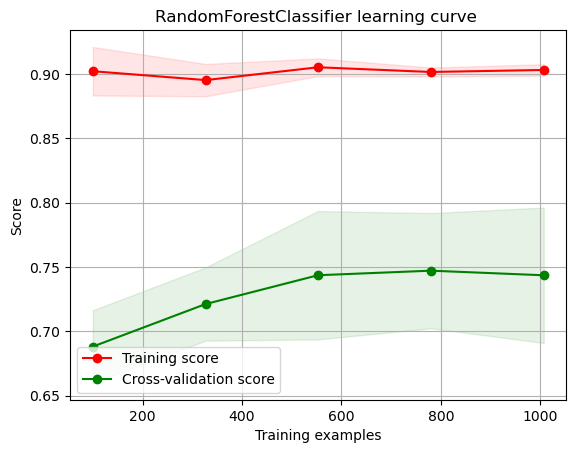

In [138]:
import warnings
warnings.simplefilter('ignore')
final_scores = []
final_mean_score=[]
final_std_score=[]

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
name=['LogisticRegression', 'AdaBoostClassifier','DecisionTreeClassifier'
,'LighGB', 'RandomForestClassifier'] 
count=0   
for gcv_out in gcv_all:  
    print(80*'_.')
    print('\n ', name[count] )  
    for train_idx, test_idx in outer_cv.split(X_train, y_train): 
        gcv_out.fit(X_train[train_idx], y_train[train_idx]) # run inner loop hyperparam tuning
        pr=gcv_out.predict(X_train[test_idx]) 
        print('\n\n score of gcv_out predict %.2f%%' % ((balanced_accuracy_score(pr, y_train[test_idx]))*100))


        print('\n       Best balanced accuracy score in inner CV %.2f%%' % (100*(gcv_out.best_score_)))
        print('        Best parameters in inner CV:', gcv_out.best_params_)
        
    
        final_scores.append((gcv_out.best_estimator_.score(X_train[test_idx], y_train[test_idx])*100))  
        print('       Best score in outer CV %.2f%%' % final_scores[-1])
        model=gcv_out.best_estimator_.fit(X_train[train_idx], y_train[train_idx])






    
    print('\n    Outer Loop:')
    print('        balanced accuracy score %.2f%% +/- %.2f' % 
                (np.mean(final_scores) , np.std(final_scores) ))
    final_mean_score.append(np.mean(final_scores) )
    final_std_score.append(np.std(final_scores) )

    plot_learning_curve(estimator = gcv_out.best_estimator_,title = "{} learning curve ".format(name[count]),
                    X = X_train, y = y_train, cv = outer_cv)
    plt.show()

    count+=1

 

Comparing scores of different models

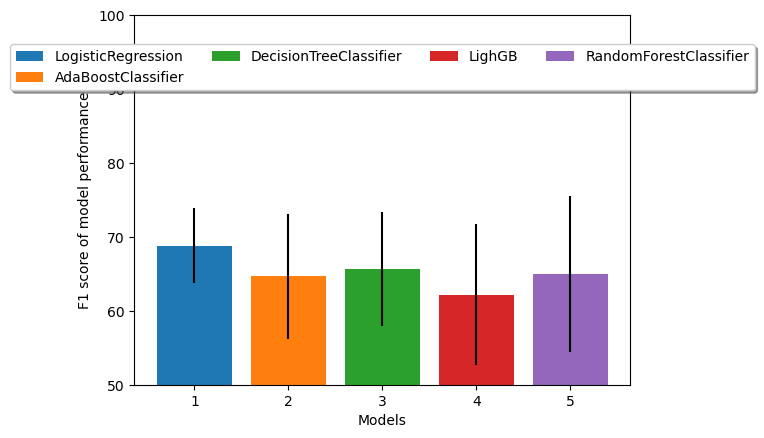

In [114]:
for i in range(1,1+len(final_mean_score)):
    plt.bar(x=i, height=final_mean_score[i-1], yerr=final_std_score[i-1] )
    plt.ylim(50,100)
    plt.legend(labels= name, 
    loc='upper center', bbox_to_anchor=(0.5, 0.94), fancybox=True, shadow=True, ncol=4)

    plt.xlabel('Models')
    plt.ylabel('F1 score of model performance')



plt.show()

Baes on above modeling results, the best model is model one (Logistigregresion). So Now I repeat nested cross validation for the best model.

In [145]:
gcv_model_select = RandomizedSearchCV(estimator=pipe1,
                                param_distributions=par1,
                                scoring='balanced_accuracy',
                                n_jobs=-1,
                                cv=inner_cv,
                                verbose=1,
                                n_iter=30,
                                refit=True)

for train_idx, test_idx in outer_cv.split(X_train, y_train): 
    gcv_model_select.fit(X_train[train_idx], y_train[train_idx]) # run inner loop hyperparam tuning
   

    print('\n       Best balanced accuracy score in inner CV %.2f%%' % (100*(gcv_model_select.best_score_)))
    print('        Best parameters in inner CV:', gcv_model_select.best_params_)
    print('       Best score in test data of outer CV %.2f%%' % (gcv_model_select.best_estimator_.score(X_train[test_idx], y_train[test_idx])*100))
        

m=gcv_model_select.best_estimator_.fit(X_train, y_train)
print('Best CV accuracy: %.2f%%' % (gcv_model_select.best_score_*100))
print('Best parameters:', gcv_model_select.best_params_)
print('test accuracy: %.2f%%' % (balanced_accuracy_score(y_test, m.predict(X_test))*100))
print('train accuracy: %.2f%%' % (balanced_accuracy_score(y_train, m.predict(X_train))*100))
con(m.predict(X_test),y_test)

Fitting 2 folds for each of 30 candidates, totalling 60 fits

       Best balanced accuracy score in inner CV 45.84%
        Best parameters in inner CV: {'rfe__n_features_to_select': 8, 'm1__penalty': 'l2', 'm1__C': 0.1}
       Best score in test data of outer CV 70.54%
Fitting 2 folds for each of 30 candidates, totalling 60 fits

       Best balanced accuracy score in inner CV 46.32%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'm1__penalty': 'l2', 'm1__C': 1000.0}
       Best score in test data of outer CV 69.64%
Fitting 2 folds for each of 30 candidates, totalling 60 fits

       Best balanced accuracy score in inner CV 47.32%
        Best parameters in inner CV: {'rfe__n_features_to_select': 6, 'm1__penalty': 'l2', 'm1__C': 10.0}
       Best score in test data of outer CV 62.50%
Fitting 2 folds for each of 30 candidates, totalling 60 fits

       Best balanced accuracy score in inner CV 47.06%
        Best parameters in inner CV: {'rfe__n_features_to_sele

,low,medium,high
low,145,75,0
medium,78,176,6
high,0,0,0
